In [1]:
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("Electricity_2022.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Date                                                    365 non-null    object 
 1   Daily Elec Consumption in Bangalore And nearby regions  365 non-null    int64  
 2   Day of the Week                                         365 non-null    object 
 3   Day Number                                              365 non-null    int64  
 4   Month of the year                                       365 non-null    object 
 5   Month number                                            365 non-null    int64  
 6   Temperature                                             365 non-null    float64
 7   Weekends                                                365 non-null    bool   
 8   Special Events                           

In [4]:
df.head(5)

,Date,Daily Elec Consumption in Bangalore And nearby regions,Day of the Week,Day Number,Month of the year,Month number,Temperature,Weekends,Special Events
0,01-01-2022,94000,Saturday,6,January,1,21.4,True,True
1,02-01-2022,94000,Sunday,7,January,1,22.0,True,False
2,03-01-2022,101000,Monday,1,January,1,20.6,False,False
3,04-01-2022,103000,Tuesday,2,January,1,20.5,False,False
4,05-01-2022,105000,Wednesday,3,January,1,20.5,False,False


In [5]:
# Convert specific columns to numeric (replace column names as needed)
columns_to_convert = ['Weekends','Special Events']
df[columns_to_convert] = df[columns_to_convert].astype(int)
df['Date']=df['Date'].apply(pd.to_datetime,errors='coerce')

# The 'errors' parameter set to 'coerce' will replace any values that cannot be converted to NaN.


C:\Users\Asus VivoBook\AppData\Local\Temp\ipykernel_9480\3057227877.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=df['Date'].apply(pd.to_datetime,errors='coerce')


In [6]:
df .head(5)

,Date,Daily Elec Consumption in Bangalore And nearby regions,Day of the Week,Day Number,Month of the year,Month number,Temperature,Weekends,Special Events
0,2022-01-01,94000,Saturday,6,January,1,21.4,1,1
1,2022-02-01,94000,Sunday,7,January,1,22.0,1,0
2,2022-03-01,101000,Monday,1,January,1,20.6,0,0
3,2022-04-01,103000,Tuesday,2,January,1,20.5,0,0
4,2022-05-01,105000,Wednesday,3,January,1,20.5,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Date                                                    365 non-null    datetime64[ns]
 1   Daily Elec Consumption in Bangalore And nearby regions  365 non-null    int64         
 2   Day of the Week                                         365 non-null    object        
 3   Day Number                                              365 non-null    int64         
 4   Month of the year                                       365 non-null    object        
 5   Month number                                            365 non-null    int64         
 6   Temperature                                             365 non-null    float64       
 7   Weekends                                                365 non

In [8]:
drop_list=['Day of the Week','Month of the year']
df_processed = df.drop(drop_list,axis='columns')


In [9]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Date                                                    365 non-null    datetime64[ns]
 1   Daily Elec Consumption in Bangalore And nearby regions  365 non-null    int64         
 2   Day Number                                              365 non-null    int64         
 3   Month number                                            365 non-null    int64         
 4   Temperature                                             365 non-null    float64       
 5   Weekends                                                365 non-null    int32         
 6   Special Events                                          365 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(3)
memory usa

In [10]:
df_processed.head(5)

,Date,Daily Elec Consumption in Bangalore And nearby regions,Day Number,Month number,Temperature,Weekends,Special Events
0,2022-01-01,94000,6,1,21.4,1,1
1,2022-02-01,94000,7,1,22.0,1,0
2,2022-03-01,101000,1,1,20.6,0,0
3,2022-04-01,103000,2,1,20.5,0,0
4,2022-05-01,105000,3,1,20.5,0,0


In [11]:
cor_matrix=df_processed.corr()

In [12]:
cor_matrix

,Date,Daily Elec Consumption in Bangalore And nearby regions,Day Number,Month number,Temperature,Weekends,Special Events
Date,1.000000,-0.326970,-0.013287,0.615779,0.293261,-0.009133,-0.074593
Daily Elec Consumption in Bangalore And nearby regions,-0.326970,1.000000,-0.143327,-0.574411,-0.156284,-0.205079,-0.067562
Day Number,-0.013287,-0.143327,1.000000,0.000774,0.010976,0.791110,-0.001079
Month number,0.615779,-0.574411,0.000774,1.000000,0.494828,-0.007430,-0.001807
Temperature,0.293261,-0.156284,0.010976,0.494828,1.000000,0.021410,0.028012
Weekends,-0.009133,-0.205079,0.791110,-0.007430,0.021410,1.000000,-0.001702
Special Events,-0.074593,-0.067562,-0.001079,-0.001807,0.028012,-0.001702,1.000000


In [13]:
is_holiday=[]
weekends=df_processed['Weekends'].tolist()
spe_eve=df_processed['Special Events'].tolist()
for i in range(365):
    if weekends[i] or spe_eve[i]:
        is_holiday.append(1)
    else:
        is_holiday.append(0)
df_processed['Is_holiday']=is_holiday

In [14]:
df_processed.head()

,Date,Daily Elec Consumption in Bangalore And nearby regions,Day Number,Month number,Temperature,Weekends,Special Events,Is_holiday
0,2022-01-01,94000,6,1,21.4,1,1,1
1,2022-02-01,94000,7,1,22.0,1,0,1
2,2022-03-01,101000,1,1,20.6,0,0,0
3,2022-04-01,103000,2,1,20.5,0,0,0
4,2022-05-01,105000,3,1,20.5,0,0,0


In [15]:
df_processed['consumption_lag1']=df_processed['Daily Elec Consumption in Bangalore And nearby regions'].shift(1)
df_processed['consumption_lag7']=df_processed['Daily Elec Consumption in Bangalore And nearby regions'].shift(7)

In [16]:
df_processed.head(10)

,Date,Daily Elec Consumption in Bangalore And nearby regions,Day Number,Month number,Temperature,Weekends,Special Events,Is_holiday,consumption_lag1,consumption_lag7
0,2022-01-01,94000,6,1,21.4,1,1,1,NaN,NaN
1,2022-02-01,94000,7,1,22.0,1,0,1,94000.0,NaN
2,2022-03-01,101000,1,1,20.6,0,0,0,94000.0,NaN
3,2022-04-01,103000,2,1,20.5,0,0,0,101000.0,NaN
4,2022-05-01,105000,3,1,20.5,0,0,0,103000.0,NaN
5,2022-06-01,105000,4,1,21.1,0,0,0,105000.0,NaN
6,2022-07-01,106000,5,1,21.4,0,0,0,105000.0,NaN
7,2022-08-01,103000,6,1,21.6,1,0,1,106000.0,94000.0
8,2022-09-01,97000,7,1,21.7,1,1,1,103000.0,94000.0
9,2022-10-01,104000,1,1,21.5,0,0,0,97000.0,101000.0


In [17]:
df_processed['consumption_lag1']=df_processed['consumption_lag1'].fillna(df_processed['consumption_lag1'].mean())
df_processed['consumption_lag7']=df_processed['consumption_lag7'].fillna(df_processed['consumption_lag7'].mean())

In [18]:
df_processed.head(10)

,Date,Daily Elec Consumption in Bangalore And nearby regions,Day Number,Month number,Temperature,Weekends,Special Events,Is_holiday,consumption_lag1,consumption_lag7
0,2022-01-01,94000,6,1,21.4,1,1,1,98370.879121,98368.715084
1,2022-02-01,94000,7,1,22.0,1,0,1,94000.000000,98368.715084
2,2022-03-01,101000,1,1,20.6,0,0,0,94000.000000,98368.715084
3,2022-04-01,103000,2,1,20.5,0,0,0,101000.000000,98368.715084
4,2022-05-01,105000,3,1,20.5,0,0,0,103000.000000,98368.715084
5,2022-06-01,105000,4,1,21.1,0,0,0,105000.000000,98368.715084
6,2022-07-01,106000,5,1,21.4,0,0,0,105000.000000,98368.715084
7,2022-08-01,103000,6,1,21.6,1,0,1,106000.000000,94000.000000
8,2022-09-01,97000,7,1,21.7,1,1,1,103000.000000,94000.000000
9,2022-10-01,104000,1,1,21.5,0,0,0,97000.000000,101000.000000


In [21]:
df_processed.head()

,Date,Daily Elec Consumption in Bangalore And nearby regions,Day Number,Month number,Temperature,Weekends,Special Events,Is_holiday,consumption_lag1,consumption_lag7
0,2022-01-01,94000,6,1,21.4,1,1,1,98370.879121,98368.715084
1,2022-02-01,94000,7,1,22.0,1,0,1,94000.000000,98368.715084
2,2022-03-01,101000,1,1,20.6,0,0,0,94000.000000,98368.715084
3,2022-04-01,103000,2,1,20.5,0,0,0,101000.000000,98368.715084
4,2022-05-01,105000,3,1,20.5,0,0,0,103000.000000,98368.715084


In [22]:
df_processed['target1'] = nd.where(df_processed['Daily Elec Consumption in Bangalore And nearby regions'] > df_processed['consumption_lag1'], 1, 0)
df_processed['target2'] = nd.where(df_processed['Daily Elec Consumption in Bangalore And nearby regions'] > df_processed['consumption_lag7'], 1, 0)

In [24]:
df_processed.head()

,Date,Daily Elec Consumption in Bangalore And nearby regions,Day Number,Month number,Temperature,Weekends,Special Events,Is_holiday,consumption_lag1,consumption_lag7,target1,target2
0,2022-01-01,94000,6,1,21.4,1,1,1,98370.879121,98368.715084,0,0
1,2022-02-01,94000,7,1,22.0,1,0,1,94000.000000,98368.715084,0,0
2,2022-03-01,101000,1,1,20.6,0,0,0,94000.000000,98368.715084,1,1
3,2022-04-01,103000,2,1,20.5,0,0,0,101000.000000,98368.715084,1,1
4,2022-05-01,105000,3,1,20.5,0,0,0,103000.000000,98368.715084,1,1


In [25]:
df_processed['target']=nd.where(df_processed['target1']&df_processed['target2'],1,0)

In [26]:
df_processed.head()

,Date,Daily Elec Consumption in Bangalore And nearby regions,Day Number,Month number,Temperature,Weekends,Special Events,Is_holiday,consumption_lag1,consumption_lag7,target1,target2,target
0,2022-01-01,94000,6,1,21.4,1,1,1,98370.879121,98368.715084,0,0,0
1,2022-02-01,94000,7,1,22.0,1,0,1,94000.000000,98368.715084,0,0,0
2,2022-03-01,101000,1,1,20.6,0,0,0,94000.000000,98368.715084,1,1,1
3,2022-04-01,103000,2,1,20.5,0,0,0,101000.000000,98368.715084,1,1,1
4,2022-05-01,105000,3,1,20.5,0,0,0,103000.000000,98368.715084,1,1,1


In [27]:
cor_matrix1 = df_processed.corr()

In [28]:
cor_matrix1

,Date,Daily Elec Consumption in Bangalore And nearby regions,Day Number,Month number,Temperature,Weekends,Special Events,Is_holiday,consumption_lag1,consumption_lag7,target1,target2,target
Date,1.000000,-0.326970,-0.013287,0.615779,0.293261,-0.009133,-0.074593,-0.042512,-0.339457,-0.384400,0.065054,0.121929,0.105451
Daily Elec Consumption in Bangalore And nearby regions,-0.326970,1.000000,-0.143327,-0.574411,-0.156284,-0.205079,-0.067562,-0.221729,0.903640,0.735278,0.165589,0.353143,0.284385
Day Number,-0.013287,-0.143327,1.000000,0.000774,0.010976,0.791110,-0.001079,0.637341,0.164899,-0.142973,-0.538064,-0.019506,-0.378959
Month number,0.615779,-0.574411,0.000774,1.000000,0.494828,-0.007430,-0.001807,-0.001052,-0.574225,-0.562215,0.035962,-0.020234,0.007424
Temperature,0.293261,-0.156284,0.010976,0.494828,1.000000,0.021410,0.028012,0.052608,-0.122471,-0.138564,-0.044693,-0.021181,0.013084
Weekends,-0.009133,-0.205079,0.791110,-0.007430,0.021410,1.000000,-0.001702,0.805629,0.057740,-0.202537,-0.544824,-0.027306,-0.379882
Special Events,-0.074593,-0.067562,-0.001079,-0.001807,0.028012,-0.001702,1.000000,0.499208,-0.005424,0.047684,-0.158236,-0.092234,-0.092589
Is_holiday,-0.042512,-0.221729,0.637341,-0.001052,0.052608,0.805629,0.499208,1.000000,0.026977,-0.146992,-0.544493,-0.082925,-0.368103
consumption_lag1,-0.339457,0.903640,0.164899,-0.574225,-0.122471,0.057740,-0.005424,0.026977,1.000000,0.710615,-0.157938,0.267536,0.055847
consumption_lag7,-0.384400,0.735278,-0.142973,-0.562215,-0.138564,-0.202537,0.047684,-0.146992,0.710615,1.000000,0.013825,-0.201248,-0.059115


In [29]:
features=['Daily Elec Consumption in Bangalore And nearby regions','Day Number','Month number','Is_holiday','consumption_lag1','consumption_lag7']

In [30]:
new_features=['Daily Elec Consumption in Bangalore And nearby regions','Day Number','Temperature','consumption_lag1','consumption_lag7']

In [31]:
X = df_processed[features]
y = df_processed['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# model building and training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.821917808219178
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        52
           1       0.72      0.62      0.67        21

    accuracy                           0.82        73
   macro avg       0.79      0.76      0.77        73
weighted avg       0.82      0.82      0.82        73



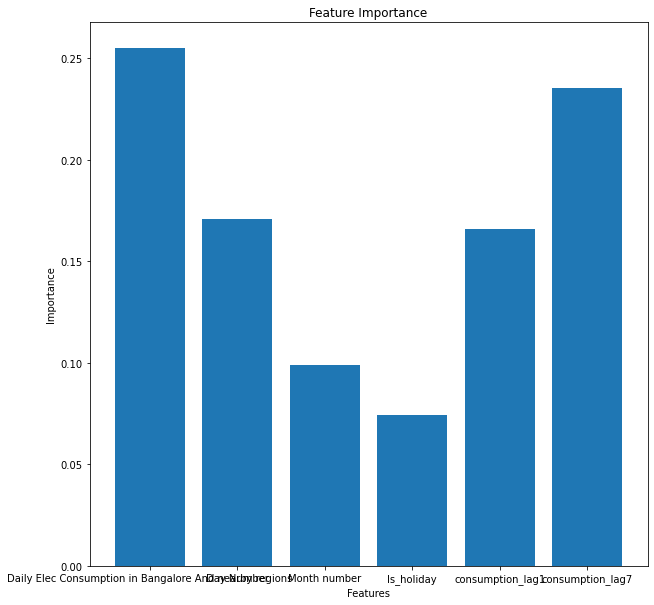

In [34]:
# feature importance
plt.figure(figsize=(10,10))
feature_importances = model.feature_importances_
plt.bar(features, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [35]:
X = df_processed[new_features]
y = df_processed['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8767123287671232
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        52
           1       0.83      0.71      0.77        21

    accuracy                           0.88        73
   macro avg       0.86      0.83      0.84        73
weighted avg       0.87      0.88      0.87        73



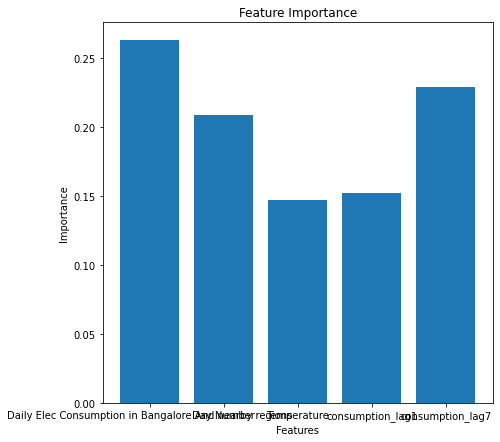

In [46]:
plt.figure(figsize=(7,7))
feature_importances = model.feature_importances_
plt.bar(new_features, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [39]:
rolling_mean_consumption_lag1 = df_processed['consumption_lag1'].rolling(window=7).mean()
rolling_mean_consumption_lag7 = df_processed['consumption_lag7'].rolling(window=7).mean()

In [40]:
consumption_lag1_data=rolling_mean_consumption_lag1.mean()
consumption_lag7_data=rolling_mean_consumption_lag7.mean()

In [41]:
print(consumption_lag1_data,consumption_lag7_data)

98357.0914759733 98360.25627630179


In [42]:
#random prediction using the model
pred = model.predict([[103000,2,20.5,101000.000000,98368.715084]])

c:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [43]:
print(pred)

[1]


In [44]:
pred = model.predict([[103000,2,20.5,consumption_lag1_data,consumption_lag7_data]])

c:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [45]:
print(pred)

[1]
